In [1]:
import pandas as pd

In [2]:
import sqlite3

In [3]:
import random

In [4]:
import faker

In [5]:
f = faker.Faker()

In [42]:
dates = [f.date() for _ in range(25)]

In [53]:
horaires = [random.randint(1,16) for _ in range(25)]

In [54]:
sorted(horaires)

[1,
 1,
 1,
 2,
 2,
 3,
 4,
 4,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 9,
 10,
 11,
 11,
 11,
 11,
 11,
 13,
 15,
 15]

In [43]:
dates

['1981-08-04',
 '2003-03-30',
 '1997-06-19',
 '2007-03-26',
 '1970-03-16',
 '1983-11-11',
 '1996-10-24',
 '2013-10-01',
 '2017-11-20',
 '1977-05-28',
 '2017-06-18',
 '2020-05-22',
 '1981-03-23',
 '2006-04-26',
 '1994-07-15',
 '2003-10-09',
 '2001-05-26',
 '2008-04-07',
 '1979-07-10',
 '1982-06-10',
 '1999-06-15',
 '2008-12-01',
 '1984-09-13',
 '2012-07-03',
 '1987-07-13']

In [23]:
cities = list(set([f.job().split(' ')[0].split(',')[0].split("'")[0] for _ in range(25)]))

In [56]:
df = pd.DataFrame()
df['item'] = cities
df['date'] = dates[:len(cities)]
df['frequency'] = horaires[:len(cities)]
df['unit'] = 'W'

In [57]:
df

item        date  frequency unit
0   Telecommunications  1981-08-04          3    W
1              Primary  2003-03-30          4    W
2                Chief  1997-06-19          4    W
3             Magazine  2007-03-26          1    W
4        Administrator  1970-03-16         15    W
5            Broadcast  1983-11-11          1    W
6       Microbiologist  1996-10-24          9    W
7           Multimedia  2013-10-01         11    W
8                Nurse  2017-11-20         11    W
9               Patent  1977-05-28         15    W
10                 Sub  2017-06-18          2    W
11              Dancer  2020-05-22         13    W
12            Minerals  1981-03-23          2    W
13           Personnel  2006-04-26          8    W
14                Arts  1994-07-15          4    W
15           Fisheries  2003-10-09         11    W
16           Scientist  2001-05-26          9    W
17              Quarry  2008-04-07          1    W
18             Curator  1979-07-10         10    W
19            Clinical  1982-06-10          6    W
20          Production  1999-06-15          7    W
21                Make  2008-12-01          8    W
22         Geophysical  1984-09-13         11    W
23            Optician  2012-07-03         11    W

In [64]:
df.to_csv('horaire_data.csv', index=False)

In [62]:
pd.to_datetime(df['date']).dt.weekday.value_counts()

0    6
3    5
1    5
4    3
6    2
5    2
2    1
Name: date, dtype: int64

In [24]:
cities

['Telecommunications',
 'Primary',
 'Chief',
 'Magazine',
 'Administrator',
 'Broadcast',
 'Microbiologist',
 'Multimedia',
 'Nurse',
 'Patent',
 'Sub',
 'Dancer',
 'Minerals',
 'Personnel',
 'Arts',
 'Fisheries',
 'Scientist',
 'Quarry',
 'Curator',
 'Clinical',
 'Production',
 'Make',
 'Geophysical',
 'Optician']

In [7]:
df = pd.read_csv('horaire.csv')

In [8]:
df = pd.read_csv('horaire_data.csv')

In [9]:
df

produit        date  horaire
0      Lake Lisa  2020-11-12       16
1   Christymouth  2020-10-09        3
2  Baileychester  2020-10-29        2
3    Ballchester  2020-10-29        4
4    Markchester  2020-01-30        1

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['produit'] = cities

In [12]:
df

produit       date  horaire
0       New Hollyside 2020-11-12       16
1        Port Rebecca 2020-10-09        3
2  South Anthonymouth 2020-10-29        2
3       New Granttown 2020-10-29        4
4          Frenchport 2020-01-30        1

In [13]:
df.to_csv('horaire_data.csv',index=False)

In [14]:
connection = sqlite3.connect('horaire.db')

In [15]:
df[['date', 'produit']].to_sql('inventory_check', con=connection, if_exists='replace', index=False)

In [16]:
pd.Series([pd.Timedelta(random.randint(7,20), 'D') for i in range(5)])

0   17 days
1    7 days
2    9 days
3    7 days
4   16 days
dtype: timedelta64[ns]

In [17]:
new_df = pd.DataFrame()
new_df['produit'] = df['produit']
new_df['date'] = df['date']+pd.Series([pd.Timedelta(random.randint(7,20), 'D') for i in range(5)])

In [18]:
new_df

produit       date
0       New Hollyside 2020-11-26
1        Port Rebecca 2020-10-25
2  South Anthonymouth 2020-11-06
3       New Granttown 2020-11-17
4          Frenchport 2020-02-11

In [19]:
new_df.to_sql('inventory_check', con=connection, if_exists='append', index=False)

In [20]:
checks = pd.read_sql('SELECT * from inventory_check', con = connection)

In [21]:
checks['date'] = pd.to_datetime(checks['date'])

In [22]:
checks

date             produit
0 2020-11-12       New Hollyside
1 2020-10-09        Port Rebecca
2 2020-10-29  South Anthonymouth
3 2020-10-29       New Granttown
4 2020-01-30          Frenchport
5 2020-11-26       New Hollyside
6 2020-10-25        Port Rebecca
7 2020-11-06  South Anthonymouth
8 2020-11-17       New Granttown
9 2020-02-11          Frenchport

In [23]:
last_checked = checks.sort_values('date').groupby(['produit']).last().reset_index()

In [24]:
last_checked

produit       date
0          Frenchport 2020-02-11
1       New Granttown 2020-11-17
2       New Hollyside 2020-11-26
3        Port Rebecca 2020-10-25
4  South Anthonymouth 2020-11-06

In [25]:
merged = df.merge(last_checked, on='produit', suffixes=('_initial','_checked'))

In [26]:
merged

produit date_initial  horaire date_checked
0       New Hollyside   2020-11-12       16   2020-11-26
1        Port Rebecca   2020-10-09        3   2020-10-25
2  South Anthonymouth   2020-10-29        2   2020-11-06
3       New Granttown   2020-10-29        4   2020-11-17
4          Frenchport   2020-01-30        1   2020-02-11

In [27]:
today = pd.Timestamp.today()

In [28]:
merged['week_difference'] = (today - merged['date_checked']).dt.days/7 

In [29]:
merged

produit date_initial  horaire date_checked  week_difference
0       New Hollyside   2020-11-12       16   2020-11-26         2.857143
1        Port Rebecca   2020-10-09        3   2020-10-25         7.428571
2  South Anthonymouth   2020-10-29        2   2020-11-06         5.714286
3       New Granttown   2020-10-29        4   2020-11-17         4.142857
4          Frenchport   2020-01-30        1   2020-02-11        44.142857

In [30]:
merged['need_to_check'] = merged['week_difference'] > merged['horaire']

In [31]:
merged

produit date_initial  horaire date_checked  week_difference  \
0       New Hollyside   2020-11-12       16   2020-11-26         2.857143   
1        Port Rebecca   2020-10-09        3   2020-10-25         7.428571   
2  South Anthonymouth   2020-10-29        2   2020-11-06         5.714286   
3       New Granttown   2020-10-29        4   2020-11-17         4.142857   
4          Frenchport   2020-01-30        1   2020-02-11        44.142857   

   need_to_check  
0          False  
1           True  
2           True  
3           True  
4           True

In [32]:
schedules = []
for i, row in merged.iterrows():
    schedule = pd.date_range(row['date_checked'], today+pd.Timedelta(52, 'W'), freq=f'{row["horaire"]*7}D')
    schedule = schedule[schedule >= today]
    schedules.append(schedule)

In [33]:
total = []
for schedule in schedules:
    for day in schedule:
        total.append((day, 1))

In [34]:
schedule_df = pd.DataFrame(total, columns=['date', 'check'])

schedule_series = pd.Series(schedule_df['check'])
schedule_series.index = schedule_df['date']

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

In [36]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

def main():
    dates, data = generate_data()
    fig, ax = plt.subplots(figsize=(10, 10))
    calendar_heatmap(ax, dates, data)
    plt.show()

def generate_data():
    num = 100
    data = np.random.randint(0, 20, num)
    start = dt.datetime(2015, 3, 1)
    dates = [start + dt.timedelta(days=i) for i in range(num)]
    return dates, data

def calendar_array(dates, data):
    i, j = zip(*[d.isocalendar()[1:] for d in dates])
    i = np.array(i) - min(i)
    j = np.array(j) - 1
    ni = max(i) + 1

    calendar = np.nan * np.zeros((ni, 7))
    calendar[i, j] = data
    return i, j, calendar


def calendar_heatmap(ax, dates, data):
    i, j, calendar = calendar_array(dates, data)
    im = ax.imshow(calendar, interpolation='none', cmap='summer')
    label_days(ax, dates, i, j, calendar)
    label_months(ax, dates, i, j, calendar)
    ax.figure.colorbar(im, fraction=0.016, pad=0.04)
    #plt.colorbar(im,fraction=0.046, pad=0.04)
    
def label_days(ax, dates, i, j, calendar):
    ni, nj = calendar.shape
    day_of_month = np.nan * np.zeros((ni, 7))
    day_of_month[i, j] = [d.day for d in dates]

    for (i, j), day in np.ndenumerate(day_of_month):
        if np.isfinite(day):
            ax.text(j, i, int(day), ha='center', va='center')

    ax.set(xticks=np.arange(7), 
           xticklabels=['L', 'M', 'M', 'J', 'V', 'S', 'D'])
    ax.xaxis.tick_top()

def label_months(ax, dates, i, j, calendar):
    month_labels = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                             'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    months = np.array([d.month for d in dates])
    uniq_months = sorted(set(months))
    yticks = [i[months == m].mean() for m in months]
    dates_df = pd.DataFrame(dates)
    dates_df.index = dates_df[0]
    new_months = dates_df.resample('7D').sum().index.values
    new_months = pd.Series(new_months).dt.month
    labels = [month_labels[m - 1] for m in new_months]
    locs, oldlabels = plt.yticks()
    new_labels = []
    for loc in locs:
        if loc < 0:
            loc = 0
        if loc >= len(labels):
            loc = len(labels)-1
        new_labels.append(labels[int(loc)])
    plt.yticks(locs, new_labels, rotation=90)    

def my_calendar(dates, data):
    fig, ax = plt.subplots(figsize=(30, 30))
    plt.locator_params(nbins=30)
    calendar_heatmap(ax, dates, data)
    plt.show()

In [182]:
resampled = schedule_series.resample('D').sum()

In [164]:
import datetime

In [178]:
dates = resampled.index.to_list()

In [179]:
data = resampled.values

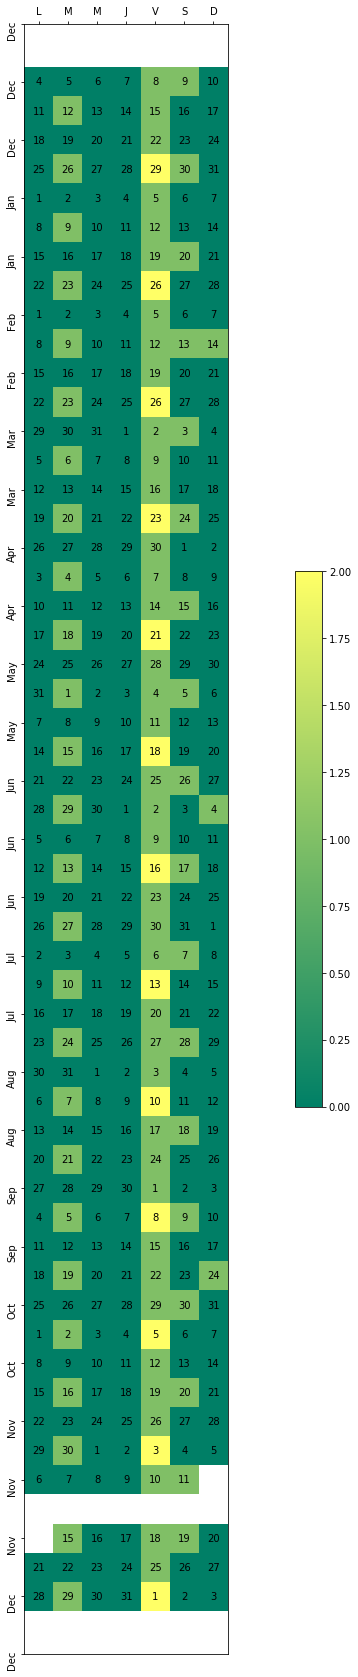

In [198]:
my_calendar(dates, data)